In [90]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [91]:
df = pd.read_csv('/Users/mihirnevpurkar/Documents/Python/new_clean_airbnb.csv')
df.head()



,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,966,193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,THE VILLAGE OF HARLEM....NEW YORK !,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,620,124,3.0,0.0,00-00-00,0.00,5.0,1.0,352.0
2,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,204,41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
3,Large Furnished Room Near B'way,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,True,strict,Private room,2005.0,1018,204,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0
4,Cute & Cozy Lower East Side 1 bdrm,verified,Miranda,Manhattan,Chinatown,40.71344,-73.99037,False,flexible,Entire home/apt,2004.0,319,64,1.0,160.0,6/9/2019,1.33,3.0,4.0,1.0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82980 entries, 0 to 82979
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NAME                            82980 non-null  object 
 1   host_identity_verified          82980 non-null  object 
 2   host name                       82980 non-null  object 
 3   neighbourhood group             82980 non-null  object 
 4   neighbourhood                   82980 non-null  object 
 5   lat                             82980 non-null  float64
 6   long                            82980 non-null  float64
 7   instant_bookable                82980 non-null  bool   
 8   cancellation_policy             82980 non-null  object 
 9   room type                       82980 non-null  object 
 10  Construction year               82980 non-null  float64
 11  price                           82980 non-null  int64  
 12  service fee                     

In [93]:
df_clust = df[['lat','long','Construction year','minimum nights','number of reviews','review rate number','availability 365']]

In [94]:
kmeans = KMeans(n_clusters=3)

In [95]:
kmeans.fit(df_clust)

KMeans(n_clusters=3)

In [97]:
y_km = kmeans.fit_predict(df_clust)

In [98]:
import matplotlib.pyplot as plt

df['y_km'] = y_km


In [99]:
df['y_km'].unique()

array([1, 2, 0], dtype=int32)

In [100]:
clust_1 = df[df['y_km'] == 0]

In [101]:
clust_1.mean()

lat                                 40.728129
long                               -73.952200
instant_bookable                     0.501374
Construction year                 2012.549735
price                              626.305181
service fee                        125.261250
minimum nights                       3.227358
number of reviews                   18.310633
reviews per month                    0.989426
review rate number                   3.290621
calculated host listings count       2.134634
availability 365                    21.264226
y_km                                 0.000000
dtype: float64

In [102]:
clust_2 = df[df['y_km'] == 1]
clust_2.mean()

lat                                 40.724780
long                               -73.940954
instant_bookable                     0.496203
Construction year                 2012.479825
price                              627.887935
service fee                        125.578590
minimum nights                       2.796764
number of reviews                   34.464936
reviews per month                    1.530614
review rate number                   3.269592
calculated host listings count       8.133754
availability 365                   316.653333
y_km                                 1.000000
dtype: float64

In [103]:
clust_3 = df[df['y_km'] == 2]
clust_3.mean()

lat                                 40.725446
long                               -73.945104
instant_bookable                     0.491972
Construction year                 2012.393184
price                              624.427425
service fee                        124.885102
minimum nights                       2.907433
number of reviews                   47.635421
reviews per month                    1.815259
review rate number                   3.253722
calculated host listings count       4.985804
availability 365                   159.285623
y_km                                 2.000000
dtype: float64

In [69]:
##CLuster EDA
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Private room'),
  Text(1, 0, 'Entire home/apt'),
  Text(2, 0, 'Shared room'),
  Text(3, 0, 'Hotel room')])

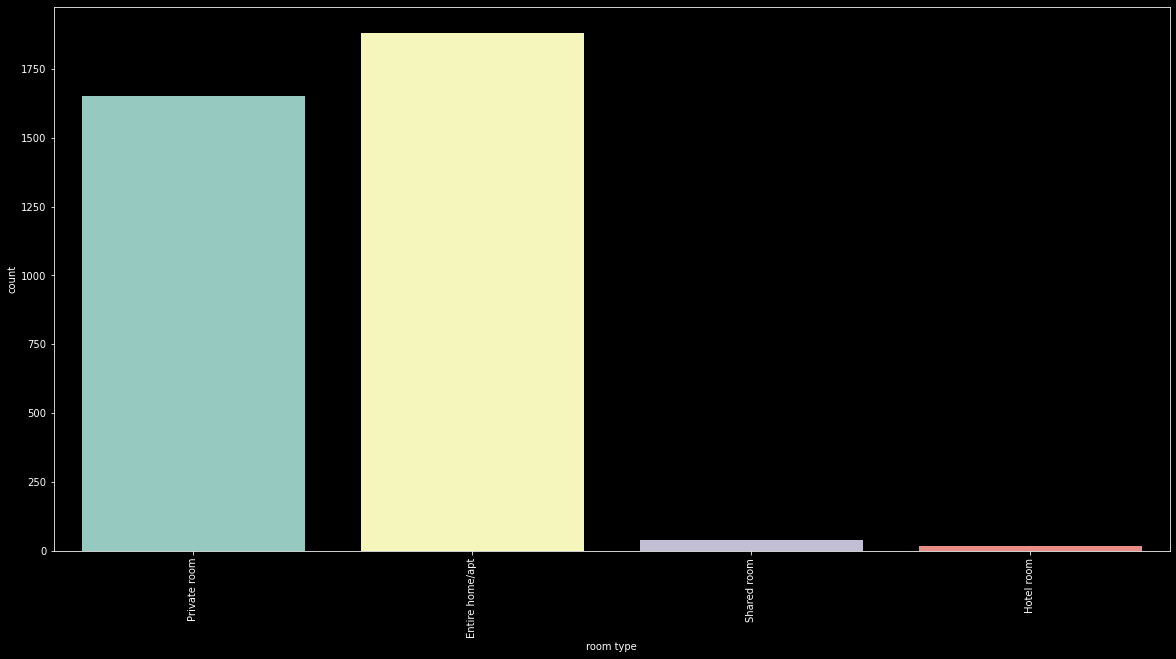

In [87]:
sns.countplot('room type',data=clust_1)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Entire home/apt'),
  Text(1, 0, 'Private room'),
  Text(2, 0, 'Shared room'),
  Text(3, 0, 'Hotel room')])

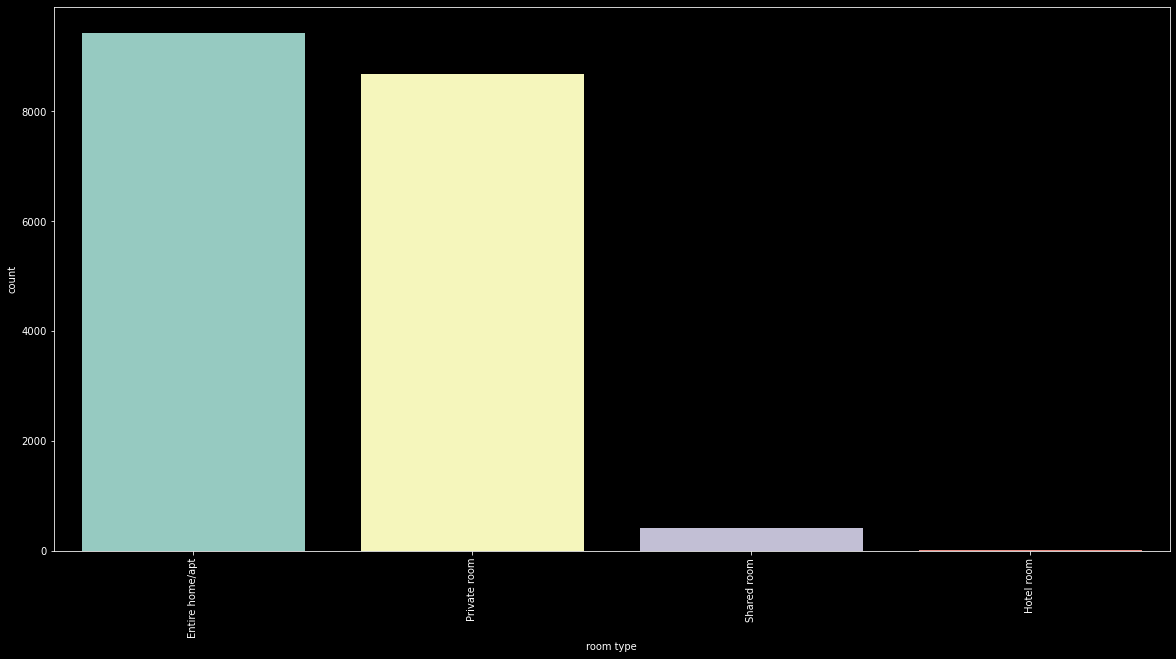

In [88]:
sns.countplot('room type',data=clust_2)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Entire home/apt'),
  Text(1, 0, 'Private room'),
  Text(2, 0, 'Shared room'),
  Text(3, 0, 'Hotel room')])

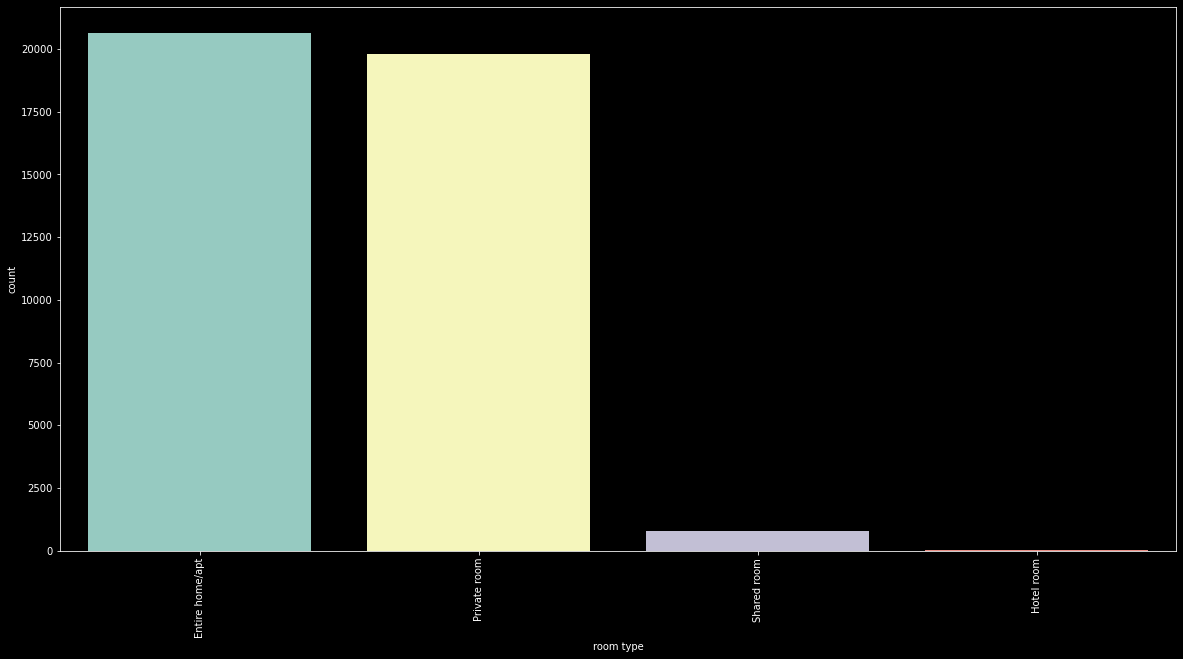

In [89]:
sns.countplot('room type',data=clust_3)
plt.xticks(rotation=90)